# Data Cleaning and Visualization

Read in the data

In [1]:
import pandas as pd

column_names = ['sentiment', 'headline']
pathname = 'financial_news_headlines.csv'
sentiment_df = pd.read_csv(pathname, encoding='ISO-8859-1', header=None, names=column_names)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


corpus = sentiment_df['headline']
labels = sentiment_df['sentiment']

corpus_shuffled, labels_shuffled = shuffle(corpus, labels, random_state=1)
corpus_train, corpus_test, labels_train, labels_test = train_test_split(corpus_shuffled, labels_shuffled, test_size=0.2, random_state=1)

In [3]:
print(corpus_train[:5])
print(corpus_train.shape)
print(corpus_test[:5])
print(corpus_test.shape)

3096    Protalix closed at $ 10.71 on Friday on the Am...
2303    The Bristol Port Company has sealed a one mill...
4171      Another problem is cola-flavoured long drinks .
1383    The group also plans to launch the 270 room At...
2363    A meeting of Glisten shareholders to vote on t...
Name: headline, dtype: object
(3876,)
3370    The Swedish player became majority owner of UC...
4298    `` We have a license agreement with Nokia Corp...
2417    Basware Einvoices Oy will be merged into the p...
4531    Finnlines estimated in its annual general meet...
3146    TeliaSonera s subsidiary , the mobile operator...
Name: headline, dtype: object
(970,)


Some visualizations

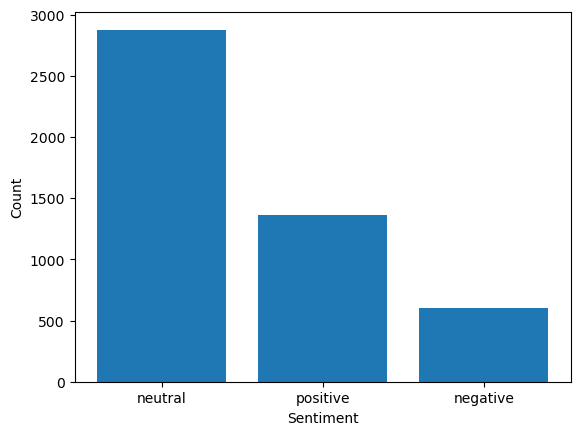

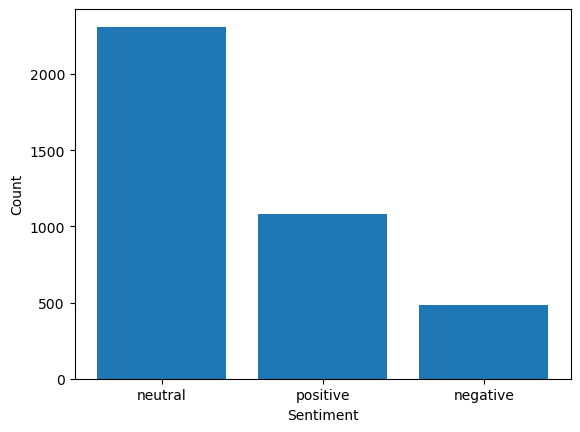

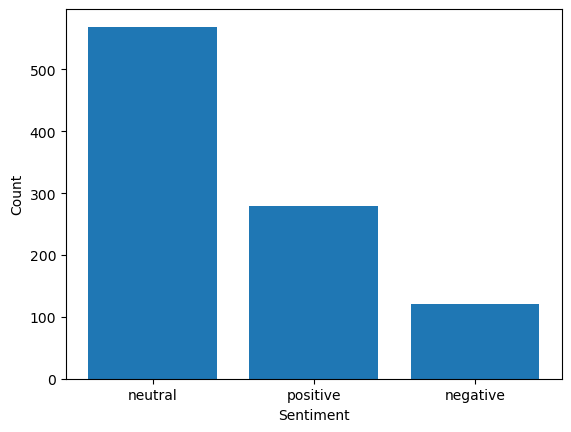

In [4]:
import matplotlib.pyplot as plt

sentiment_counts = labels.value_counts()
plt.bar(sentiment_counts.index, sentiment_counts)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

sentiment_counts_train = labels_train.value_counts()
plt.bar(sentiment_counts_train.index, sentiment_counts_train)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

sentiment_counts_test = labels_test.value_counts()
plt.bar(sentiment_counts_test.index, sentiment_counts_test)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [5]:
#pip install wordcloud

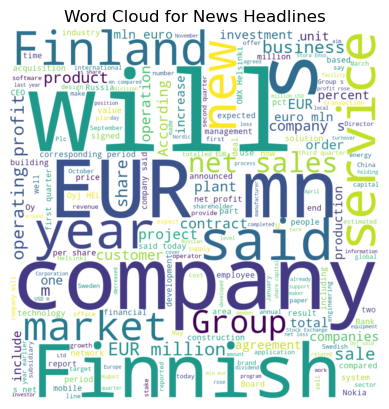

In [6]:
from wordcloud import WordCloud

text = ' '.join(corpus_train)
wordcloud = WordCloud(width=1000, height=1000, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for News Headlines')
plt.axis('off')
plt.show()

#Obserevations 
#Headlines mostly related to European, particularly Finnish, companies
#Also mostly about individual companies

Text feature extraction and data splitting

In [224]:
#Text feature extraction (using Bag of Words approach with unigrams) for training data
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 1))  # Use individual words as tokens
X_train = vectorizer.fit_transform(corpus_train)
y_train = np.array(labels_train)
print(X_train.shape)
print(y_train.shape)
feature_names = vectorizer.get_feature_names_out()

(3876, 8972)
(3876,)


In [225]:
#Text feature extraction (using Bag of Words approach with unigrams) for testing data
X_test = vectorizer.transform(corpus_test)
y_test = np.array(labels_test)
print(X_test.shape)
print(y_test.shape)

(970, 8972)
(970,)


# Logistic Regression

In [284]:
#Logistic regression 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

Logistic regression: Hyperparameter tuning 


Note: The code below takes a long time to run, so we have commented it out and hardcoded the best parameters after tuning in the next section.

In [285]:
#Hyperparameter tuning
# logreg_costlist1 = {'C': [0.001, 0.01, 0.1, 1, 10, 100]} 
# logreg = LogisticRegression(max_iter=1000, random_state=1)

# cost_grid1 = GridSearchCV(logreg, logreg_costlist1, cv=5, scoring='f1_weighted')
# cost_grid1.fit(X_train, y_train)
# best_C1 = cost_grid1.best_params_['C']
# print(best_C1) #10

In [286]:
# logreg_costlist2 = {'C': [10, 20, 30, 40, 50, 60, 70, 80, 90]} 
# cost_grid2 = GridSearchCV(logreg, logreg_costlist2, cv=5, scoring='f1_weighted')
# cost_grid2.fit(X_train, y_train)
# best_C2 = cost_grid2.best_params_['C'] 
# print(best_C2) #20

Logistic regression: Final model, results, and coefficients

In [287]:
best_C = 20
logreg_final = LogisticRegression(C=best_C, max_iter=1000, random_state=1)
logreg_final.fit(X_train, y_train)
y_pred = logreg_final.predict(X_test)

In [288]:
from sklearn.metrics import classification_report

logreg_report = classification_report(y_test, y_pred, target_names=['Class Negative', 'Class Positive', 'Class Neutral'])

# Print the classification report
print(logreg_report)

                precision    recall  f1-score   support

Class Negative       0.75      0.56      0.64       121
Class Positive       0.79      0.88      0.83       569
 Class Neutral       0.70      0.63      0.66       280

      accuracy                           0.76       970
     macro avg       0.75      0.69      0.71       970
  weighted avg       0.76      0.76      0.76       970



In [289]:
weights = logreg_final.coef_  #get weights
print(weights)
sorted_weights = np.argsort(weights)  #sort weights
feature_names = vectorizer.get_feature_names_out()  #get the features
print(feature_names)

print('\nLowest weighted words (indicative of positive sentiment)')
for i in range(20):
    print(f"{feature_names[sorted_weights[0, i]]}: {weights[0, sorted_weights[0, i]]}")
    
print('\nHighest weighted words (indicative of negative sentiment)')
for i in range(20):
    print(f"{feature_names[sorted_weights[0, len(sorted_weights[0]) - i - 1]]}: {weights[0, sorted_weights[0, len(sorted_weights[0]) - i - 1]]}")

[[-1.58814051 -0.54080897 -0.0821988  ... -0.04577951 -0.05677537
  -0.03996891]
 [ 0.57737882  0.21212855  0.26429361 ...  0.10426851  0.5220894
   0.23342894]
 [ 1.0107617   0.32868042 -0.18209481 ... -0.05848899 -0.46531404
  -0.19346003]]
['00' '000' '000063' ... 'æskyl' 'ætehuolto' 'ðl']

Lowest weighted words (indicative of positive sentiment)
up: -5.298449723740245
rose: -4.828971269188565
increased: -4.367824761457641
increase: -3.8268634721255665
new: -3.4282549658444497
flight: -3.0010794822057902
20: -2.7797343546459827
business: -2.595444261765905
will: -2.489714158121455
started: -2.441806449123444
all: -2.373675409439433
an: -2.2925880932091696
program: -2.2399543488735736
and: -2.2266809081499472
technology: -2.170020322762406
euros: -2.1547903701598408
improved: -2.1519477754695324
approximately: -2.1446525933399956
transferred: -2.122191664772566
annual: -2.1182433417198654

Highest weighted words (indicative of negative sentiment)
down: 9.700829444406512
decreased: 9.

# SVM

SVM-linear kernel

SVM-linear kernel: Hyperparameter Tuning

In [ ]:
# svm_linear = SVC(kernel='linear', probability=True)  
# svm_linear_costlist1 = {
#     'C': [0.1, 1, 10, 20, 30],
# }
# cost_grid1 = GridSearchCV(svm_linear, svm_linear_costlist1, cv=5, scoring='f1_weighted')
# cost_grid1.fit(X_train, y_train)
# best_C1 = cost_grid1.best_params_['C']
# print(best_C1) #10

In [ ]:
# svm_linear_costlist2 = {
#     'C': [1, 5, 10, 15],
# }
# cost_grid2 = GridSearchCV(svm_linear, svm_linear_costlist2, cv=5, scoring='f1_weighted')
# cost_grid2.fit(X_train, y_train)
# best_C2 = cost_grid2.best_params_['C']
# print(best_C2) #5

SVM-linear kernel: Final model and results

In [76]:
best_C = 5

In [77]:
svc_linear_final = SVC(kernel='linear', probability=True, C=best_C)
svc_linear_final.fit(X_train, y_train)
svc_linear_pred = svc_linear_final.predict(X_test)

In [78]:
svc_linear_report = classification_report(y_test, svc_linear_pred, target_names=['Class Negative', 'Class Positive', 'Class Neutral'])
print(svc_linear_report)

                precision    recall  f1-score   support

Class Negative       0.65      0.65      0.65       121
Class Positive       0.81      0.84      0.82       569
 Class Neutral       0.67      0.62      0.64       280

      accuracy                           0.75       970
     macro avg       0.71      0.70      0.71       970
  weighted avg       0.75      0.75      0.75       970



SVM-poly kernel

SVM-poly kernel: Hyperparameter tuning

In [85]:
# #SVM with a polynomial kernel
# svm_poly = SVC(kernel='poly', probability=True)  
# svm_poly_params = {
#     'C': [0.1, 1, 10, 20, 30],
#     'degree': [2, 3, 4]
# }
# cost_grid1 = GridSearchCV(svm_poly, param_grid=svm_poly_params, cv=5, scoring='f1_weighted')
# cost_grid1.fit(X_train, y_train)
# best_C1 = cost_grid1.best_params_['C']
# best_degree1 = cost_grid1.best_params_['degree']
# print(best_C1) #20
# print(best_degree1) #2

SVM-poly kernel: Final model and results

In [86]:
best_C = 20
best_degree = 2

In [87]:
svm_poly_final = SVC(kernel='poly', probability=True, C=best_C, degree=best_degree)
svm_poly_final.fit(X_train, y_train)
svc_poly_pred = svm_poly_final.predict(X_test)

In [88]:
svc_poly_report = classification_report(y_test, svc_poly_pred, target_names=['Class Negative', 'Class Positive', 'Class Neutral'])

#print classification report
print(svc_poly_report)

                precision    recall  f1-score   support

Class Negative       0.80      0.36      0.49       121
Class Positive       0.72      0.96      0.82       569
 Class Neutral       0.79      0.43      0.56       280

      accuracy                           0.74       970
     macro avg       0.77      0.58      0.62       970
  weighted avg       0.75      0.74      0.71       970



SVM-rbf kernel

SVM-rbf kernel: Hyperparameter tuning 

In [89]:
#SVM with a rbf kernel
# svm_rbf = SVC(kernel='rbf', probability=True)

# svm_poly_params = {
#     'C': [0.1, 1, 10, 20, 30],
#     'gamma': [1, 0.1, 0.01, 0.001]
# }
# cost_grid1 = GridSearchCV(svm_rbf, param_grid=svm_poly_params, cv=5, scoring='f1_weighted')
# cost_grid1.fit(X_train, y_train)
# best_C1 = cost_grid1.best_params_['C']
# best_gamma1 = cost_grid1.best_params_['gamma']
# print(best_C1) #20
# print(best_gamma1) #0.1

SVM-rbf kernel: Final model and results

In [90]:
best_C = 20
best_gamma = 0.1

In [91]:
svm_rbf_final = SVC(kernel='rbf', probability=True, C=best_C, gamma=best_gamma)
svm_rbf_final.fit(X_train, y_train)

SVC(C=20, gamma=0.1, probability=True)

In [92]:
svm_rbf_pred = svm_poly_final.predict(X_test)

In [98]:
svm_rbf_report = classification_report(y_test, svm_rbf_pred, target_names=['Class Negative', 'Class Positive', 'Class Neutral'])

#print classification report
print(svm_rbf_report)

                precision    recall  f1-score   support

Class Negative       0.80      0.36      0.49       121
Class Positive       0.72      0.96      0.82       569
 Class Neutral       0.79      0.43      0.56       280

      accuracy                           0.74       970
     macro avg       0.77      0.58      0.62       970
  weighted avg       0.75      0.74      0.71       970



# Neural Networks

In [226]:
from sklearn.neural_network import MLPClassifier

Neural networks: Hyperparameter tuning

In [227]:
# #Neural networks
# from sklearn.neural_network import MLPClassifier
# param_grid = {
#     'activation': ['tanh', 'relu', 'logistic'],
#     'alpha': [0.0001, 0.001, 0.01]
#     'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
# }

# # tuning the hyperparameters
# mlp = MLPClassifier(max_iter=300, random_state=1)
# grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='f1_weighted')
# grid_search.fit(X_train, y_train)
# print(grid_search.best_params_)
# {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (100,)}

In [228]:
best_activation = 'logistic'
best_alpha = 0.01
best_hidden_layer_sizes = (100,) #one layer with 100 neurons
neural_final = MLPClassifier(activation=best_activation, alpha=best_alpha, hidden_layer_sizes=best_hidden_layer_sizes)
neural_final.fit(X_train, y_train)
neural_pred = neural_final.predict(X_test)
neural_report = classification_report(y_test, neural_pred, target_names=['Class Negative', 'Class Positive', 'Class Neutral'])

#print classification report
print(neural_report)

                precision    recall  f1-score   support

Class Negative       0.75      0.57      0.65       121
Class Positive       0.79      0.87      0.83       569
 Class Neutral       0.69      0.62      0.66       280

      accuracy                           0.76       970
     macro avg       0.74      0.69      0.71       970
  weighted avg       0.76      0.76      0.76       970



/Users/victorialu/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Decision Tree and Random Forest 

In [14]:
from sklearn import tree  # Using sklearn Decision Tree classifier
from sklearn import ensemble  # Using sklearn Random Forest classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Decision tree: Hyperparameter tuning

In [236]:
# #Tuning max_depth for Decision Tree
# dt_params = {'max_depth': [10, 20, 30, 40, 50, 100]}
# dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='f1_weighted')
# dt_grid.fit(X_train, y_train)
# print(dt_grid.best_params_) #30

{'max_depth': 30}


In [16]:
best_max_depth = 30

Decision tree: Final model and results

In [18]:
from sklearn.metrics import classification_report 
dt_final = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
dt_final.fit(X_train, y_train)
dt_y_pred = dt_final.predict(X_test)
dt_report = classification_report(y_test, dt_y_pred, target_names=['Class Negative', 'Class Positive', 'Class Neutral'])
print(dt_report)

                precision    recall  f1-score   support

Class Negative       0.58      0.37      0.45       121
Class Positive       0.72      0.85      0.78       569
 Class Neutral       0.58      0.46      0.51       280

      accuracy                           0.68       970
     macro avg       0.63      0.56      0.58       970
  weighted avg       0.66      0.68      0.66       970



Random forest: Hyperparameter tuning

In [359]:
# rf_params =  {'max_depth': [30, 40, 50, 100, 200, 500]}
# rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='f1_weighted')
# rf_grid.fit(X_train, y_train)
# print(rf_grid.best_params_) #500 

In [239]:
# rf_params =  {'max_depth': [500, 1000, 1500, 2000]}
# rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='f1_weighted')
# rf_grid.fit(X_train, y_train)
# print(rf_grid.best_params_) #None 

{'max_depth': 500}


In [240]:
best_max_depth = 500

Random forest: Final model and results

In [241]:
from sklearn.metrics import classification_report 
rf_final = RandomForestClassifier(max_depth=best_max_depth, random_state=42)
rf_final.fit(X_train, y_train)
rf_y_pred = rf_final.predict(X_test)
rf_report = classification_report(y_test, rf_y_pred, target_names=['Class Negative', 'Class Positive', 'Class Neutral'])
print(rf_report)

                precision    recall  f1-score   support

Class Negative       0.82      0.34      0.48       121
Class Positive       0.73      0.97      0.83       569
 Class Neutral       0.79      0.45      0.58       280

      accuracy                           0.74       970
     macro avg       0.78      0.59      0.63       970
  weighted avg       0.76      0.74      0.71       970



In [242]:
feature_importances = rf_final.feature_importances_
feature_names = vectorizer.get_feature_names_out() 
print(feature_importances[:10])

[2.16292814e-04 1.06780225e-03 3.33640090e-08 2.88742211e-05
 0.00000000e+00 9.60471686e-06 1.21850343e-04 0.00000000e+00
 2.06764200e-05 1.65835708e-05]


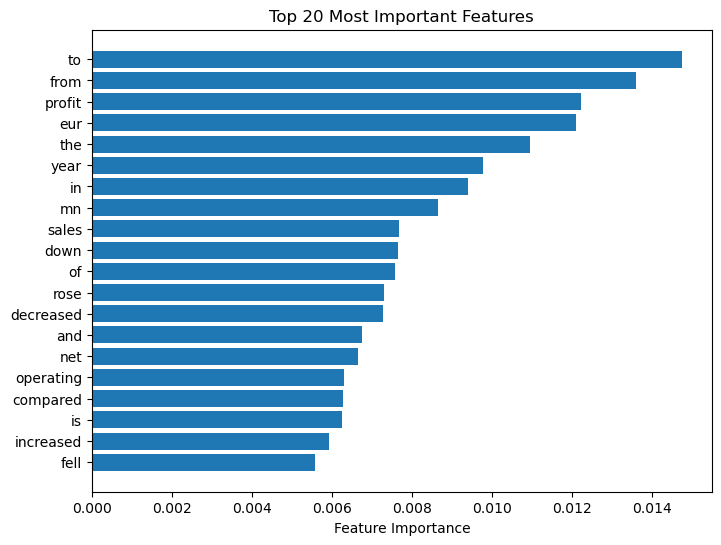

In [243]:
top_feature_indices = np.argsort(feature_importances)[-20:]
top_feature = feature_importances[top_feature_indices]

plt.figure(figsize=(8, 6))
plt.barh(range(len(top_feature_indices)), top_feature, align='center')
plt.yticks(np.arange(len(top_feature_indices)), np.array(feature_names)[top_feature_indices])
plt.xlabel('Feature Importance')
plt.title('Top 20 Most Important Features')
plt.show()

# kNN

In [28]:
#kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

kNN: Hyperparameter tuning

In [29]:
# Initialize KNN Classifier
# knn = KNeighborsClassifier()

# # Define the parameter grid
# knn_params = {
#     'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(knn, knn_params, cv=5, n_jobs=-1, verbose=1)

In [30]:
best_n_neighbors = 13

kNN: Final model and results

In [34]:
# Fit the model
knn_model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

# Test the model
kNN_report = classification_report(y_test, y_pred, target_names=['Class Negative', 'Class Positive', 'Class Neutral'])
print(kNN_report)

                precision    recall  f1-score   support

Class Negative       0.54      0.40      0.46       121
Class Positive       0.74      0.88      0.80       569
 Class Neutral       0.58      0.42      0.49       280

      accuracy                           0.69       970
     macro avg       0.62      0.57      0.59       970
  weighted avg       0.67      0.69      0.67       970



# Perceptron

Perceptron: Hyperparameter tuning

In [273]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron

In [274]:
best_max_iter = 100

perceptron_model = Perceptron(random_state=1)
perceptron_model.fit(X_train, y_train)
y_pred = perceptron_model.predict(X_test)

# Test the model
perceptron_report = classification_report(y_test, y_pred, target_names=['Class Negative', 'Class Positive', 'Class Neutral'])
print(perceptron_report)

                precision    recall  f1-score   support

Class Negative       0.70      0.60      0.65       121
Class Positive       0.79      0.85      0.82       569
 Class Neutral       0.68      0.61      0.64       280

      accuracy                           0.75       970
     macro avg       0.72      0.69      0.70       970
  weighted avg       0.74      0.75      0.75       970



In [275]:
weights = perceptron_model.coef_[0]
feature_names = vectorizer.get_feature_names_out() 

positive_weights = [(feature, weight) for feature, weight in zip(feature_names, weights) if weight > 0]
negative_weights = [(feature, weight) for feature, weight in zip(feature_names, weights) if weight < 0]
sorted_positive_weights = sorted(positive_weights, key=lambda x: x[1], reverse=True)
sorted_negative_weights = sorted(negative_weights, key=lambda x: x[1])

print("Top Positive Weights (indicative of negative sentiment):")
for feature, weight in sorted_positive_weights[:20]:
    print(f"{feature}: {weight}")

# Print the top negative weights
print("\nTop Negative Weights (indicative of positive sentiment):")
for feature, weight in sorted_negative_weights[:20]:
    print(f"{feature}: {weight}")

Top Positive Weights (indicative of negative sentiment):
down: 4.253202297397022
decreased: 3.639872923422945
fell: 3.2800641823232155
declined: 1.9656809803928732
drop: 1.907524652790269
result: 1.9012814760796894
dropped: 1.8831920395589368
slipped: 1.8642085207823127
burdened: 1.835443078395734
longer: 1.7186551956316123
gone: 1.6990433395378148
below: 1.6417670664791357
off: 1.6273440522635756
given: 1.604804437584269
because: 1.5995608903748513
strike: 1.4984977855329287
parent: 1.463716895397079
decline: 1.4600361506853612
kroons: 1.4352617961088339

Top Negative Weights (indicative of positive sentiment):
rose: -2.856506185103066
increased: -2.466191604160188
up: -2.269764187077253
20: -1.9172804703958841
increase: -1.7295132596137277
improved: -1.6199330777782055
flight: -1.6139559298475832
euros: -1.5207836036372486
operations: -1.409913407830428
442: -1.3175402465899744
business: -1.3064067615507575
2011: -1.2734526482897057
159: -1.235754603373918
plc: -1.2310427770239596
ne

# Clustering

In [276]:
from sklearn.cluster import KMeans

costs = []
k_values = [1,2,3,4,5,6,7,8,9,10]
for k in k_values:
    clustering = KMeans(n_clusters=k)
    
    # Fit the model and calculate the cost
    clustering.fit(X_train)
    costs.append(clustering.inertia_)

/Users/victorialu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


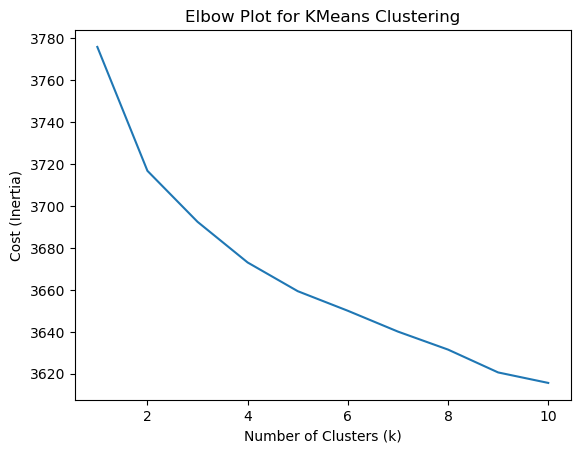

In [277]:
plt.plot(k_values, costs)
plt.title('Elbow Plot for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost (Inertia)')
plt.show() #about 4 or 5

In [278]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1)
kmeans_assignment = kmeans.fit_predict(X_train)
print(kmeans_assignment[:10])

[0 0 0 0 0 0 0 0 2 0]
